
# Physics 311 — Final Project (Driven Pendulum)

**Format:** Each task presents math/explanation in this text cell, followed by code cells that perform the requested simulations and produce labeled plots.



## Task 1 — Lagrangian, momentum, Hamiltonian, Hamilton's equations (no small-angle approx)

Consider a simple pendulum of length $ \ell $ and mass $ m $ whose **support point** oscillates vertically as
$$
y_s(t) = A\cos(\omega t), \qquad A \ll \ell.
$$
Let $ \theta(t) $ be the angular displacement **from the downward vertical**. The bob’s Cartesian coordinates are
$$
x = \ell \sin\theta,\qquad y = y_s + \ell \cos\theta = A\cos(\omega t) + \ell \cos\theta.
$$
Velocities:
$$
\dot x = \ell\cos\theta\,\dot\theta,\qquad
\dot y = -A\omega \sin(\omega t) - \ell\sin\theta\,\dot\theta.
$$

Kinetic energy $T$ and potential energy $V$ (taking $V=0$ at $y=0$):
$$
T = \tfrac12 m\left(\dot x^{\,2}+\dot y^{\,2}\right)
  = \tfrac12 m\Big[\ell^2\dot\theta^{\,2} - 2A\ell\omega \sin(\omega t)\sin\theta\,\dot\theta + A^2\omega^2\sin^2(\omega t)\Big],
$$
$$
V = mgy = mg\big(A\cos(\omega t)+\ell\cos\theta\big).
$$

The **Lagrangian** $ \mathcal{L}=T-V $ is
$$
\mathcal{L}(\theta,\dot\theta,t)=\tfrac12 m\ell^2\dot\theta^{\,2}
- mA\ell\omega \sin(\omega t)\sin\theta\,\dot\theta
+ \tfrac12 mA^2\omega^2\sin^2(\omega t)
- mgA\cos(\omega t) - mg\ell\cos\theta.
$$

The **generalized momentum** $p_\theta=\partial\mathcal{L}/\partial\dot\theta$ is
$$
p_\theta = m\ell^2\dot\theta - mA\ell\omega \sin(\omega t)\sin\theta.
$$

The **Hamiltonian** $H=p_\theta\dot\theta-\mathcal{L}$ after algebra becomes
$$
H(\theta,p_\theta,t)
= \frac{\big(p_\theta + mA\ell\omega \sin(\omega t)\sin\theta\big)^{2}}{2m\ell^{2}}
- \tfrac12 mA^2\omega^2\sin^2(\omega t)
+ mgA\cos(\omega t) + mg\ell\cos\theta.
$$

**Hamilton’s equations**:
$$
\dot\theta=\frac{\partial H}{\partial p_\theta}
= \frac{p_\theta + mA\ell\omega \sin(\omega t)\sin\theta}{m\ell^2},
$$
$$
\dot p_\theta = -\frac{\partial H}{\partial \theta}
= -\frac{\big(p_\theta + mA\ell\omega \sin(\omega t)\sin\theta\big)}{m\ell^{2}}
\cdot \big(mA\ell\omega \sin(\omega t)\cos\theta\big) - mg\ell(-\sin\theta).
$$
One may check that these imply the Euler–Lagrange equation in Task 2.



## Task 2 — Derive the equation of motion

Starting from the Lagrangian above and applying the Euler–Lagrange equation
$$
\frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\dot\theta}\right) - \frac{\partial\mathcal{L}}{\partial\theta}=0,
$$
one obtains, after cancellations using $a\equiv A/\ell$ and $\omega_0\equiv\sqrt{g/\ell}$,
$$
\boxed{\;\ddot\theta - \sin\theta\,\big(a\,\omega^{2}\cos(\omega t)-\omega_0^{2}\big)=0.\;}
$$
This is the exact, **nonlinear**, no–small-angle equation used below.



## Shared simulation utilities (used in Tasks 3–6)

We integrate the full nonlinear equation (with optional damping $b$ and optional additive torque $S\cos(\Omega_s t)$):
$$
\ddot\theta + b\,\dot\theta = \sin\theta\,\big(a\,\omega^{2}\cos(\omega t)-\omega_0^{2}\big) + S\cos(\Omega_s t).
$$


Starting from the nonlinear pendulum equation (no drive, no damping):
$$
\ddot{\theta} + \omega_0^2 \sin\theta = 0, 
\qquad \omega_0 = \sqrt{\tfrac{g}{\ell}}.
$$

Multiply both sides by $\dot{\theta}$ to obtain conservation of energy:
$$
\frac{d}{dt}\!\left(\tfrac{1}{2}\dot{\theta}^2 - \omega_0^2 \cos\theta\right) = 0.
$$

So the energy is constant:
$$
E = \tfrac{1}{2}\dot{\theta}^2 - \omega_0^2 \cos\theta.
$$

If the amplitude is $\theta_0$ (turning point, where $\dot{\theta}=0$), then
$$
E = -\omega_0^2 \cos\theta_0.
$$

Thus the velocity satisfies
$$
\dot{\theta}^2 = 2\omega_0^2 \big(\cos\theta - \cos\theta_0\big).
$$

Now invert:
$$
dt = \frac{d\theta}{\sqrt{2\omega_0^2(\cos\theta - \cos\theta_0)}}.
$$

The period is
$$
T = 4 \int_0^{\theta_0} 
\frac{d\theta}{\sqrt{2\omega_0^2(\cos\theta - \cos\theta_0)}}.
$$

Use the trigonometric identity
$$
\cos\theta - \cos\theta_0 
= 2\sin^2\!\Big(\tfrac{\theta_0}{2}\Big) 
- 2\sin^2\!\Big(\tfrac{\theta}{2}\Big).
$$

Define $k = \sin(\tfrac{\theta_0}{2})$ and substitute $\sin(\tfrac{\theta}{2}) = k\sin\phi$.
Then
$$
T = \frac{4}{\omega_0} \int_0^{\pi/2} \frac{d\phi}{\sqrt{1 - k^2 \sin^2\phi}}.
$$

This is the **complete elliptic integral of the first kind**:
$$
T = \frac{4}{\omega_0} K(k), 
\qquad k = \sin\!\left(\tfrac{\theta_0}{2}\right).
$$


In [4]:

import numpy as np
import matplotlib.pyplot as plt

def rk4_step(f, t, y, h):  #use runge-kutta 4 for numerical integration 
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h,     y + h*k3)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def simulate(theta0, omega0, a, w, w0, b=0.0, S=0.0, wS=None,
             tmax=20.0, h=1e-3):
    """
    Integrate: theta'' + b*theta' = sin(theta)*(a*w^2*cos(w*t) - w0^2) + S*cos(wS*t)
    Returns t, theta, omega
    """
    if wS is None:
        wS = 0.0
    def f(t, y):
        th, om = y
        drive_param = a*(w**2)*np.cos(w*t) - (w0**2)
        rhs = np.sin(th)*drive_param + S*np.cos(wS*t) - b*om
        return np.array([om, rhs], dtype=float)
    n = int(tmax/h)
    t = np.linspace(0.0, n*h, n+1)
    y = np.array([theta0, omega0], dtype=float)
    th = np.empty(n+1); omv = np.empty(n+1)
    th[0]=y[0]; omv[0]=y[1]
    for i in range(n):
        y = rk4_step(f, t[i], y, h)
        th[i+1]=y[0]; omv[i+1]=y[1]
    return t, th, omv

def plot_theta(t, th, title):
    plt.figure(figsize=(8,3))
    plt.plot(t, th, linewidth=1.2)
    plt.xlabel('t [s]')
    plt.ylabel(r'$\theta$ [rad]')
    plt.title(title)

def estimate_period(t, th):
    # crude period estimate from zero-crossings of detrended signal
    sig = th - np.mean(th[int(0.2*len(th)):])  # ignore initial offset
    zc = np.where(np.diff(np.sign(sig))>0)[0]  # rising zero-crossings
    if len(zc) >= 3:
        Ts = np.diff(t[zc])
        return np.mean(Ts[1:])  # skip first to reduce transient bias
    return np.nan



## Task 3 — Undriven motion ($a=0$); amplitude dependence of period; harmonic?

Here we set $a=0$ (no support motion) and take $\omega_0=2\pi\ \mathrm{rad/s}$.
We integrate for initial conditions $\dot\theta(0)=0$ and
$\theta(0)\in\{0.1\pi,\ 0.3\pi,\ 0.6\pi,\ 0.9\pi\}$.
We then compare the estimated periods.
**Expectation:** For the nonlinear pendulum the period **increases** with amplitude;
small-angle motion is harmonic only in the $|\theta|\ll1$ limit.


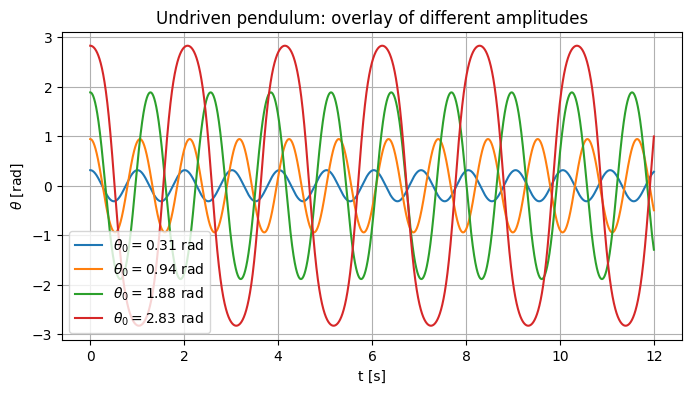

Estimated periods (s):
theta0=0.314 -> T~1.0062 s, f~0.994 Hz
theta0=0.942 -> T~1.0586 s, f~0.945 Hz
theta0=1.885 -> T~1.2817 s, f~0.780 Hz
theta0=2.827 -> T~2.0722 s, f~0.483 Hz


In [5]:
w0 = 2*np.pi  # rad/s
amps = [0.1*np.pi, 0.3*np.pi, 0.6*np.pi, 0.9*np.pi]
results = []

plt.figure(figsize=(8,4))
for th0 in amps:
    t, th, om = simulate(theta0=th0, omega0=0.0, a=0.0, w=0.0, w0=w0, tmax=12.0, h=1e-3)
    plt.plot(t, th, label=fr'$\theta_0={th0:.2f}$ rad')
    T_est = estimate_period(t, th)
    results.append((th0, T_est))

plt.xlabel('t [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Undriven pendulum: overlay of different amplitudes')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated periods (s):")
for th0, T in results:
    print(f"theta0={th0:.3f} -> T~{T:.4f} s, f~{(1.0/T if np.isfinite(T) else np.nan):.3f} Hz")



**Conclusion (Task 3).** The period lengthens as amplitude increases, confirming **non-isochrony**.
Oscillations are **not** strictly harmonic except in the small-angle regime; this makes sense since the restoring torque is $ \propto\sin\theta $, not $\theta$. Specifically, the period increases because of the softening nonlinearity in the restoring force due to $\sin(\theta)$ for increasing amplitude $|\theta_{\text{max}}|$.



## Task 4(a) — Behavior at “resonance” $\omega=\omega_0$ with $a=0.1$

We set $a=0.1$, $\omega=\omega_0=2\pi$. The linearized small-angle form is a **Mathieu-type** equation,
$\ddot\theta + \big(\omega_0^2 - a\omega^2\cos\omega t\big)\theta=0$, which exhibits parametric resonance near **$2\omega_0$**, not at $\omega_0$.
Thus, even without damping, we do **not** expect unbounded growth at $\omega=\omega_0$.

We integrate the full nonlinear equation and plot $\theta(t)$ to show it remains bounded.


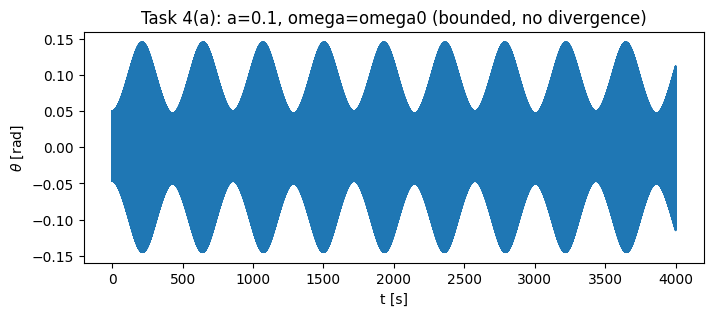

In [9]:

a = 0.1
w = w0
t, th, om = simulate(theta0=0.05, omega0=0.0, a=a, w=w, w0=w0, tmax=4000.0, h=5e-4)
plot_theta(t, th, 'Task 4(a): a=0.1, omega=omega0 (bounded, no divergence)')


### Why $\theta(t)$ does **not** diverge at “resonance” ($\omega = \omega_0$, $a = 0.1$)

1) **It’s a parametric (not force) drive.**  
   Linearizing the pendulum for small angles gives a Mathieu-type equation  
   $$
   \ddot{\theta}+\big(\omega_0^2 - a\omega^2\cos(\omega t)\big)\theta=0,
   $$
   whose principal parametric resonance occurs near $\omega \approx 2\omega_0$, **not** at $\omega=\omega_0$.  
   At $\omega=\omega_0$ we are away from the principal parametric band, so unbounded growth is not expected.

2) **Anharmonicity prevents amplitude divergence.**  
   The exact pendulum is nonlinear ($\sin\theta$), so its natural frequency **decreases with amplitude** (“softening”).  
   For the undriven pendulum,
   $$
   T(\theta_0)=\frac{4}{\omega_0}K\!\left(\sin\frac{\theta_0}{2}\right),\qquad
   \omega_{\text{nl}}(\theta_0)=\frac{2\pi}{T(\theta_0)}=\frac{\pi\omega_0}{2\,K\!\left(\sin\frac{\theta_0}{2}\right)},
   $$
   hence $\omega_{\text{nl}}<\omega_0$ as amplitude grows.  
   Even if the drive initially adds energy, the softening **detunes** the motion away from the drive, the phase slips, and the **average injected power tends to zero**. The amplitude therefore saturates instead of diverging.
   
   This periodic detuning is reflected in the slowly-varying envelope of the oscillatory motion (shown in detail over the long simulation)

**Contrast with the driven harmonic oscillator:**  
For $x''+\omega_0^2 x = F\cos(\omega t)$ without damping, exact resonance $\omega=\omega_0$ yields linear-in-time growth of amplitude.  
Here, the drive is parametric and the pendulum is anharmonic—together they **block** that divergence.



## Task 4(b) — Oscillation about the inverted position

For sufficiently **high drive frequency** and small $a<0.1$, the inverted state $\theta \approx \pi$ can be stabilized (Kapitza stabilization).
We start near vertical: $\theta(0)=0.95\pi, \dot{\theta}(0)=0 $, scan large $\omega$ values, and show a case with sustained oscillation about $\pi$.


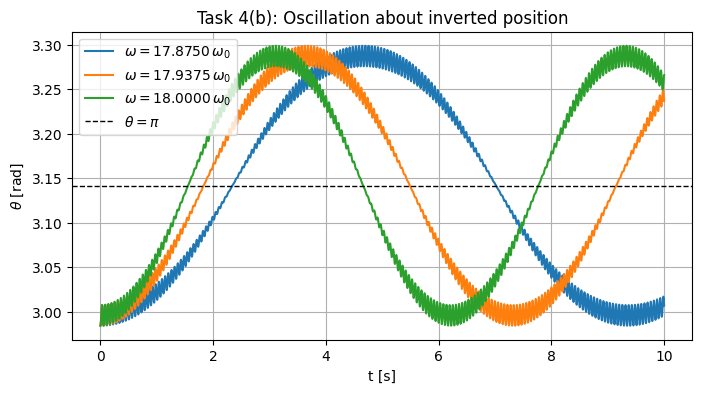

In [7]:
a = 0.08
w_candidates = [17.875*w0, 17.9375*w0, 18*w0]  # try several high frequencies

plt.figure(figsize=(8,4))
for w in w_candidates:
    t, th, om = simulate(theta0=0.95*np.pi, omega0=0.0, a=a, w=w, w0=w0, tmax=10.0, h=2e-4)
    plt.plot(t, th, label=fr'$\omega={w/w0:.4f}\,\omega_0$')

plt.axhline(np.pi, color='k', ls='--', lw=1, label=r'$\theta=\pi$')
plt.xlabel('t [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Task 4(b): Oscillation about inverted position')
plt.legend()
plt.grid(True)
plt.show()



**Observation.** At sufficiently high $\omega$ $(\approx 17.875 \omega_{0})$ with small $a$, the solution can remain bounded about $\theta=\pi$, demonstrating the **effective stabilization** of the inverted equilibrium.



## Task 5 — Larger driving amplitudes and signatures of chaos

We increase $a$ and explore $\theta(t)$. In a nonlinear, periodically driven system,
one often observes irregular $\theta(t)$, broadband spectra, and strong sensitivity to initial conditions.
I illustrate with two trajectories whose initial angles differ by $10^{-6}$ rad under the same parameters.


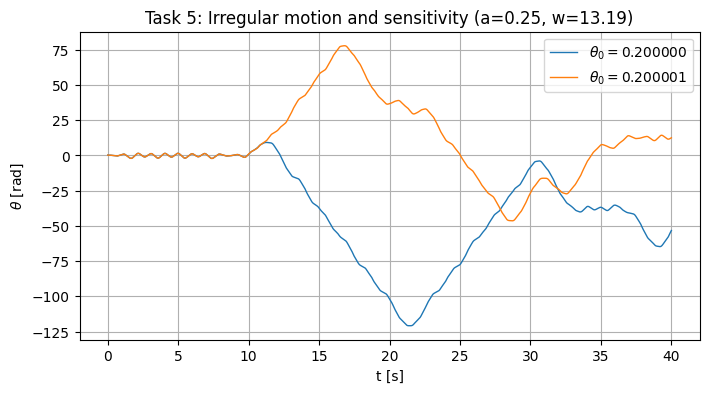

In [33]:
a = 0.25
w = 2.1*w0   # off simple commensurability

t1, th1, om1 = simulate(theta0=0.2, omega0=0.0, a=a, w=w, w0=w0, tmax=40.0, h=5e-4)
t2, th2, om2 = simulate(theta0=0.200001, omega0=0.0, a=a, w=w, w0=w0, tmax=40.0, h=5e-4)

plt.figure(figsize=(8,4))
plt.plot(t1, th1, linewidth=1.0, label=r'$\theta_0=0.200000$')
plt.plot(t2, th2, linewidth=1.0, label=r'$\theta_0=0.200001$')
plt.xlabel('t [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title(f'Task 5: Irregular motion and sensitivity (a={a}, w={w:.2f})')
plt.legend()
plt.grid(True)
plt.show()



**Comment.** The irregular, aperiodic waveform and rapid divergence of nearby trajectories are **signatures of chaos** in this driven nonlinear system.
